In [86]:
import pandas  as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score

## Step 1: Importing the data

In [87]:
data = pd.read_csv('./data/insurance.csv')
data.info

<bound method DataFrame.info of       age     sex     bmi  children smoker     region      charges
0      19  female  27.900         0    yes  southwest  16884.92400
1      18    male  33.770         1     no  southeast   1725.55230
2      28    male  33.000         3     no  southeast   4449.46200
3      33    male  22.705         0     no  northwest  21984.47061
4      32    male  28.880         0     no  northwest   3866.85520
...   ...     ...     ...       ...    ...        ...          ...
1333   50    male  30.970         3     no  northwest  10600.54830
1334   18  female  31.920         0     no  northeast   2205.98080
1335   18  female  36.850         0     no  southeast   1629.83350
1336   21  female  25.800         0     no  southwest   2007.94500
1337   61  female  29.070         0    yes  northwest  29141.36030

[1338 rows x 7 columns]>

## Step 2: Preprocessing

### 1. Converting to numerical data

In [88]:

data['sex']=data['sex'].replace({'male': 0, 'female': 1})
data['smoker'] = data['smoker'].replace({'yes': 1, 'no': 0})
data['region'] = data['region'].replace({'southwest': 1, 'southeast': 2, 'northwest': 3, 'northeast': 4})
data

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,1,1,16884.92400
1,18,0,33.770,1,0,2,1725.55230
2,28,0,33.000,3,0,2,4449.46200
3,33,0,22.705,0,0,3,21984.47061
4,32,0,28.880,0,0,3,3866.85520
...,...,...,...,...,...,...,...
1333,50,0,30.970,3,0,3,10600.54830
1334,18,1,31.920,0,0,4,2205.98080
1335,18,1,36.850,0,0,2,1629.83350
1336,21,1,25.800,0,0,1,2007.94500


### 2. Correlation Plot to find the correlation and the strength of each feature 

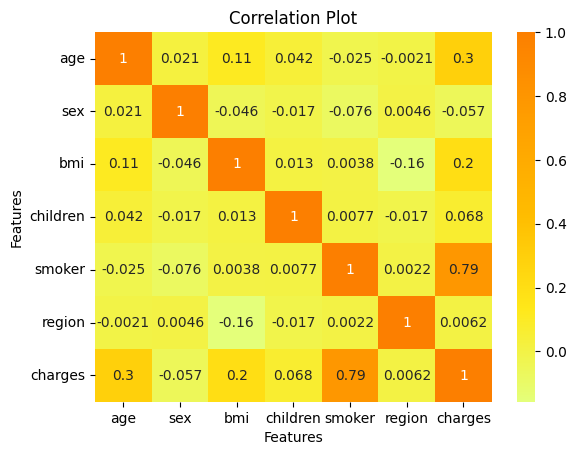

In [89]:
corr = data.corr()
sns.heatmap(corr, cmap='Wistia', annot=True)
plt.title('Correlation Plot')
plt.xlabel('Features')
plt.ylabel('Features')
plt.show()

From the correlation Plot w find that the 'Smoker' feature has the largest correlation then age then bmi

In [90]:
x = data.drop(columns=['charges']) 
y = data['charges']

### 3. Detecting the outliers using z-score

In [91]:
outliers=[]
def detect_outliers_Z_Score(data):
    
    threshold=3
    mean = np.mean(data)
    std =np.std(data)
    
    for i in data:
        z_score= (i - mean)/std 
        if np.abs(z_score) > threshold:
            outliers.append(i)
    return outliers

In [92]:
outlier_pt=detect_outliers_Z_Score( x['bmi'])
outlier_pt

[49.06, 50.38, 52.58, 53.13]

### 4. Finding the InterQuantile Range

In [93]:
sorted(x["bmi"]);

In [94]:
quantile1, quantile3= np.percentile(x["bmi"],[25,75])
print(quantile1,quantile3)

26.29625 34.69375


In [95]:
iqr_value=quantile3-quantile1
print(iqr_value)

8.3975


In [96]:
lower_bound_val = quantile1 -(1.5 * iqr_value) 
upper_bound_val = quantile3 +(1.5 * iqr_value) 
print(lower_bound_val,upper_bound_val)

13.7 47.290000000000006


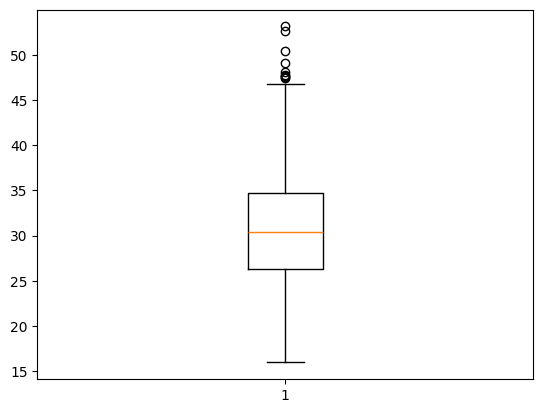

In [97]:
plt.boxplot(x["bmi"])
plt.show()

In [98]:
def detect_outliers(lower_bound_val,upper_bound_val,data):
    for i in data:
        if i < lower_bound_val or i >upper_bound_val :
            outliers.append(i)
    return outliers

In [99]:
outlier_pt= detect_outliers(lower_bound_val,upper_bound_val,x["bmi"])
outlier_pt

[49.06,
 50.38,
 52.58,
 53.13,
 49.06,
 48.07,
 47.52,
 47.41,
 50.38,
 47.6,
 52.58,
 47.74,
 53.13]

### 5. Replacing Outliers with the median

In [100]:
cleaned_data = x[~x['bmi'].isin(outlier_pt)]
cleaned_data

,age,sex,bmi,children,smoker,region
0,19,1,27.900,0,1,1
1,18,0,33.770,1,0,2
2,28,0,33.000,3,0,2
3,33,0,22.705,0,0,3
4,32,0,28.880,0,0,3
...,...,...,...,...,...,...
1333,50,0,30.970,3,0,3
1334,18,1,31.920,0,0,4
1335,18,1,36.850,0,0,2
1336,21,1,25.800,0,0,1


In [101]:
median=cleaned_data["bmi"].median()
median

30.3

In [102]:
x['bmi'] = np.where(x['bmi'].isin(outlier_pt), median, x['bmi'])
x

,age,sex,bmi,children,smoker,region
0,19,1,27.900,0,1,1
1,18,0,33.770,1,0,2
2,28,0,33.000,3,0,2
3,33,0,22.705,0,0,3
4,32,0,28.880,0,0,3
...,...,...,...,...,...,...
1333,50,0,30.970,3,0,3
1334,18,1,31.920,0,0,4
1335,18,1,36.850,0,0,2
1336,21,1,25.800,0,0,1


### 6. Splitting the data
Spliting the data into training and testing data with 80% and 20% respectively

In [103]:
# splitting data manually into training and testing data with 80% and 20% respectively
split_ratio = 0.8
split_idx = int(split_ratio * len(x))

x_train_1, x_test_1 = x[:split_idx], x[split_idx:]
y_train_1, y_test_1 = y[:split_idx], y[split_idx:]

### 7. Normalizing the data

In [104]:
mean = np.mean(x_train_1, axis=0)
std = np.std(x_train_1, axis=0)

X_train_norm = (x_train_1 - np.mean(x_train_1, axis=0)) / np.std(x_train_1, axis=0)
X_test_norm = (x_test_1 - np.mean(x_train_1, axis=0)) / np.std(x_train_1, axis=0)

# It's important to use the mean and standard deviation values from the training data 
# for normalization to ensure consistency and comparability between the training and test sets.

## Step 3: Building the model

In [105]:
def lin_regression(x,y, alpha, T):
    training_no, features_no  = x.shape 
    weight = np.zeros(features_no) 
    bias = 0
    for t in range( T ) : 
        y_pred = x.dot(weight) + bias
        dW = - ( 2 * (x.T ).dot(y- y_pred )  ) / training_no 
        db = - 2 * np.sum( y - y_pred) / training_no  
        weight = weight - alpha * dW 
        bias = bias - alpha * db 
    return weight,bias

In [106]:
weight, bias=lin_regression(X_train_norm.to_numpy(),y_train_1.to_numpy(),0.1,200)
y_pred= X_test_norm.dot( weight) + bias 

## Step 4: Calculating the mean sqaure error and r squared

In [107]:
mean_y = np.mean(y_test_1)
ss_total = np.sum((y_test_1 - mean_y) ** 2)
ss_residual = np.sum((y_test_1 - y_pred) ** 2)
r_squared = 1 - (ss_residual / ss_total)
print(f'R-squared = {r_squared}')

R-squared = 0.7613385316461354


The R-squared without finding the outliers is 0.7580723949522934 < 0.7613385316461354 which means the accuracy is better when detecting and replacing the outliers with the median. Although there is no significant change as the outliers is too small.

## Step 5: Visualising and Representing the results

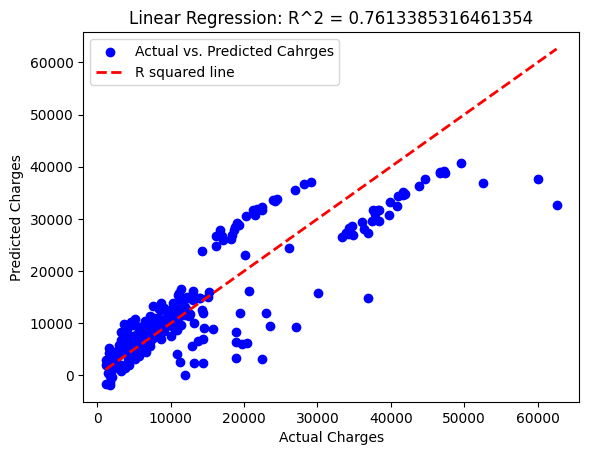

In [108]:
plt.scatter(y_test_1, y_pred, c='blue', label='Actual vs. Predicted Cahrges')
plt.plot([min(y_test_1), max(y_test_1)], [min(y_test_1), max(y_test_1)], color='red', lw=2, linestyle='--', label='R squared line')
plt.xlabel("Actual Charges")
plt.ylabel("Predicted Charges")
plt.title(f"Linear Regression: R^2 = {r_squared}")
plt.legend()
plt.show()